In [3]:
import torch
import torch.nn as nn

## Sequential way of creating model

In [32]:
X = torch.rand(10, 20)

In [36]:
model_sequential = nn.Sequential(
    nn.Linear(in_features=20, out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=32),
    nn.ReLU(),
    nn.Linear(in_features=32, out_features=5),
    nn.Softmax()
)

In [37]:
model_sequential

Sequential(
  (0): Linear(in_features=20, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=5, bias=True)
  (5): Softmax(dim=None)
)

In [38]:
y_predict = model_sequential(X)
y_predict

d:\SW\anaconda3\envs\CV_krish\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.1974, 0.1851, 0.1907, 0.2001, 0.2267],
        [0.1975, 0.1844, 0.1941, 0.2011, 0.2228],
        [0.1957, 0.1841, 0.1955, 0.2027, 0.2220],
        [0.1947, 0.1850, 0.1950, 0.1992, 0.2261],
        [0.1961, 0.1843, 0.1944, 0.2017, 0.2235],
        [0.1970, 0.1816, 0.1918, 0.1974, 0.2322],
        [0.1917, 0.1849, 0.1980, 0.1989, 0.2264],
        [0.1961, 0.1864, 0.1967, 0.1957, 0.2251],
        [0.1995, 0.1815, 0.1842, 0.2102, 0.2246],
        [0.1947, 0.1850, 0.1923, 0.2016, 0.2264]], grad_fn=<SoftmaxBackward0>)

## Functional API approach

In [39]:
class FunctionalModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 5)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    def forward(self, X):
        x = self.relu(self.fc1(X))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return self.softmax(x)
    


In [40]:
X = torch.rand(10, 20)
functional_model = FunctionalModel()
functional_model(X)

d:\SW\anaconda3\envs\CV_krish\Lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.2055, 0.1983, 0.1861, 0.2239, 0.1861],
        [0.2239, 0.1952, 0.1865, 0.2078, 0.1865],
        [0.2115, 0.1916, 0.1841, 0.2287, 0.1841],
        [0.2184, 0.1985, 0.1848, 0.2131, 0.1853],
        [0.2153, 0.2013, 0.1861, 0.2112, 0.1861],
        [0.2146, 0.1935, 0.1832, 0.2255, 0.1832],
        [0.2121, 0.1910, 0.1817, 0.2336, 0.1817],
        [0.2077, 0.1954, 0.1840, 0.2290, 0.1840],
        [0.2214, 0.1923, 0.1869, 0.2133, 0.1861],
        [0.2126, 0.1995, 0.1848, 0.2182, 0.1848]], grad_fn=<SoftmaxBackward0>)

In [ ]:
functional_model.fc1.weight

Parameter containing:
tensor([[ 0.0032,  0.1960,  0.1863,  ...,  0.2212,  0.1866, -0.1925],
        [ 0.1966, -0.0537,  0.1232,  ..., -0.0362, -0.0526,  0.1665],
        [-0.1517, -0.0940, -0.1653,  ..., -0.0931, -0.1899,  0.1225],
        ...,
        [-0.0947,  0.1874, -0.0601,  ...,  0.1713, -0.2084, -0.0739],
        [-0.1197, -0.1719,  0.0094,  ...,  0.0104,  0.1596, -0.1649],
        [-0.0493, -0.0399, -0.0990,  ...,  0.0006,  0.0302, -0.0147]],
       requires_grad=True)

In [46]:
functional_model.parameters()

<generator object Module.parameters at 0x0000027A526E8820>

In [52]:
for layer in functional_model.parameters():
    print(layer)
    if hasattr(layer, "weight") and layer.weight is not None:
        print(layer.weight.data)

Parameter containing:
tensor([[ 0.0032,  0.1960,  0.1863,  ...,  0.2212,  0.1866, -0.1925],
        [ 0.1966, -0.0537,  0.1232,  ..., -0.0362, -0.0526,  0.1665],
        [-0.1517, -0.0940, -0.1653,  ..., -0.0931, -0.1899,  0.1225],
        ...,
        [-0.0947,  0.1874, -0.0601,  ...,  0.1713, -0.2084, -0.0739],
        [-0.1197, -0.1719,  0.0094,  ...,  0.0104,  0.1596, -0.1649],
        [-0.0493, -0.0399, -0.0990,  ...,  0.0006,  0.0302, -0.0147]],
       requires_grad=True)
['H', 'T', '__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__

In [56]:
functional_model

FunctionalModel(
  (fc1): Linear(in_features=20, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=5, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=None)
)

### Multiclass Classification with pytorch

In [58]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 10.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/11.1 MB 11.2 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 11.3 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 10.5 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   -- ------------------------------------- 2.4/44.8 MB 12.3 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/44.8 MB 11.9 MB/s eta 0:00:04
   ------ --------------------------------- 7.1/44

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
data = load_iris()
X = data["data"]
y = data["target"]

In [8]:
X = torch.tensor(X, dtype=torch.float32).to("cpu")
y = torch.tensor(y, dtype=torch.long).to("cpu")

In [9]:
torch.cuda.is_available()

False

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [11]:
type(X_train)

torch.Tensor

In [12]:
scalar = StandardScaler()
X_train_standard = scalar.fit_transform(X_train)
X_test_standard = scalar.fit_transform(X_test)

In [13]:
type(X_test_standard), type(X_train_standard)

(numpy.ndarray, numpy.ndarray)

In [14]:
X_train_standard = torch.tensor(X_train_standard, dtype=torch.float32).to("cpu")
X_test_standard = torch.tensor(X_test_standard, dtype=torch.float32).to("cpu")
type(X_train_standard), type(X_test_standard)

(torch.Tensor, torch.Tensor)

In [15]:
type(y_train), type(y_test)

(torch.Tensor, torch.Tensor)

In [103]:
class IrisDataModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        self.relu = nn.ReLU()

    def forward(self, X):
        x = self.relu(self.fc1(X))
        x = self.relu(self.fc2(x))
        return self.softmax(self.fc3(x))

In [104]:
input_size = X_train_standard.shape[1]
hidden_size = 64
num_classes = 3

model = IrisDataModel(input_size, hidden_size, num_classes).to("cpu")
num_epoch = 100
batch_size = 16
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [105]:
for epoch in range(1, num_epoch+1):
    y_predict = model(X_train_standard)
    loss = criterion(y_predict, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

    print(f"epoch: {epoch}, loss: {loss.item():.4f}")

epoch: 1, loss: 1.0209
epoch: 2, loss: 0.8234
epoch: 3, loss: 0.6549
epoch: 4, loss: 0.5132
epoch: 5, loss: 0.4051
epoch: 6, loss: 0.3274
epoch: 7, loss: 0.2689
epoch: 8, loss: 0.2232
epoch: 9, loss: 0.1898
epoch: 10, loss: 0.1636
epoch: 11, loss: 0.1376
epoch: 12, loss: 0.1134
epoch: 13, loss: 0.0953
epoch: 14, loss: 0.0820
epoch: 15, loss: 0.0703
epoch: 16, loss: 0.0626
epoch: 17, loss: 0.0605
epoch: 18, loss: 0.0558
epoch: 19, loss: 0.0507
epoch: 20, loss: 0.0474
epoch: 21, loss: 0.0421
epoch: 22, loss: 0.0381
epoch: 23, loss: 0.0372
epoch: 24, loss: 0.0352
epoch: 25, loss: 0.0326
epoch: 26, loss: 0.0320
epoch: 27, loss: 0.0312
epoch: 28, loss: 0.0291
epoch: 29, loss: 0.0285
epoch: 30, loss: 0.0280
epoch: 31, loss: 0.0264
epoch: 32, loss: 0.0260
epoch: 33, loss: 0.0255
epoch: 34, loss: 0.0242
epoch: 35, loss: 0.0237
epoch: 36, loss: 0.0232
epoch: 37, loss: 0.0222
epoch: 38, loss: 0.0220
epoch: 39, loss: 0.0215
epoch: 40, loss: 0.0207
epoch: 41, loss: 0.0205
epoch: 42, loss: 0.0199
e

## NeuralNet + Dropout

In [16]:
import torch.nn as nn
import torch.optim as optim

class NeuralNetAdvanced(nn.Module):
    def __init__(self, 
                 input_size, 
                 hidden_size_0, 
                 hidden_size_1, 
                 hidden_size_2, 
                 num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_0)
        self.fc2 = nn.Linear(hidden_size_0, hidden_size_1)
        self.fc3 = nn.Linear(hidden_size_1, hidden_size_2)
        self.fc4 = nn.Linear(hidden_size_2, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        self.relu = nn.ReLU()
        self.dropout_1 = nn.Dropout(0.3)
        self.dropout_2 = nn.Dropout(0.5)

    def forward(self, X):
        x = self.relu(self.fc1(X))
        x = self.dropout_1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout_2(x)
        x = self.relu(self.fc3(x))
        x = self.dropout_1(x)
        x = self.softmax(self.fc4(x))
        # return self.softmax(self.fc3(x))
        return x

In [39]:
input_size = X_train.shape[1]
hidden_size_0 = 32
hidden_size_1 = 64
hidden_size_2 = 64
num_classes = 3
model = NeuralNetAdvanced(input_size, 
                          hidden_size_0,
                          hidden_size_1,
                          hidden_size_2,
                          num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.015)
num_epoch = 300

In [40]:
model

NeuralNetAdvanced(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=3, bias=True)
  (softmax): LogSoftmax(dim=1)
  (relu): ReLU()
  (dropout_1): Dropout(p=0.3, inplace=False)
  (dropout_2): Dropout(p=0.5, inplace=False)
)

In [42]:
for epoch in range(1, num_epoch+1):
    y_predict = model(X_train_standard)
    loss = criterion(y_predict, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

    print(f"epoch: {epoch}, loss: {loss.item():.4f}")

epoch: 1, loss: 0.0235
epoch: 2, loss: 0.0677
epoch: 3, loss: 0.0218
epoch: 4, loss: 0.0197
epoch: 5, loss: 0.0030
epoch: 6, loss: 0.0192
epoch: 7, loss: 0.0067
epoch: 8, loss: 0.0376
epoch: 9, loss: 0.0192
epoch: 10, loss: 0.0232
epoch: 11, loss: 0.0695
epoch: 12, loss: 0.0295
epoch: 13, loss: 0.0039
epoch: 14, loss: 0.0015
epoch: 15, loss: 0.0285
epoch: 16, loss: 0.0106
epoch: 17, loss: 0.0289
epoch: 18, loss: 0.0124
epoch: 19, loss: 0.0123
epoch: 20, loss: 0.0392
epoch: 21, loss: 0.0186
epoch: 22, loss: 0.0488
epoch: 23, loss: 0.0293
epoch: 24, loss: 0.0149
epoch: 25, loss: 0.0083
epoch: 26, loss: 0.0074
epoch: 27, loss: 0.0271
epoch: 28, loss: 0.0161
epoch: 29, loss: 0.0188
epoch: 30, loss: 0.0613
epoch: 31, loss: 0.0354
epoch: 32, loss: 0.0255
epoch: 33, loss: 0.0044
epoch: 34, loss: 0.0225
epoch: 35, loss: 0.0099
epoch: 36, loss: 0.0250
epoch: 37, loss: 0.0125
epoch: 38, loss: 0.0067
epoch: 39, loss: 0.0212
epoch: 40, loss: 0.0057
epoch: 41, loss: 0.0634
epoch: 42, loss: 0.0144
e

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

class NumericalDataLoader(Dataset):
    def __init__(self, data, labels):

        if not isinstance(data, pd.DataFrame):
            raise Exception("Incorrect format of DataFrame")
        
        self.data = data.values

        if not isinstance(labels, pd.Series):
            raise Exception("Incorrect format of Labels")
        self.labels = labels.values

        if len(self.data) != len(self.labels):
            raise Exception("Incorrect length of features and target")

        self.data = torch.tensor(self.data, dtype=torch.float32)
        self.labels = torch.tensor(self.labels, dtype=torch.long)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]
    

        

In [12]:
import csv
import os

data_list = [
    [0.374540, 0.950714, 0.731994, 0.598658, 0],
    [0.156019, 0.155995, 0.058084, 0.866176, 1],
    [0.601115, 0.708073, 0.020584, 0.969910, 0],
    [0.832443, 0.212339, 0.181825, 0.183405, 2],
    [0.304242, 0.524756, 0.431945, 0.291229, 1],
    [0.611853, 0.139494, 0.292145, 0.366362, 2],
    [0.456070, 0.785176, 0.199674, 0.514234, 1],
    [0.592415, 0.046450, 0.607545, 0.170524, 0],
    [0.065052, 0.948886, 0.965632, 0.808397, 2],
    [0.304614, 0.097672, 0.684233, 0.440152, 1],
]
with open("write_data.csv", "w", newline="") as file:
    csv_obj = csv.writer(file)
    csv_obj.writerow(["Feature1", "Feature2", "Feature3", "Feature4", "Target"])
    csv_obj.writerows(data_list)

In [13]:
data =pd.read_csv("write_data.csv")
data.head(10)

,Feature1,Feature2,Feature3,Feature4,Target
0,0.374540,0.950714,0.731994,0.598658,0
1,0.156019,0.155995,0.058084,0.866176,1
2,0.601115,0.708073,0.020584,0.969910,0
3,0.832443,0.212339,0.181825,0.183405,2
4,0.304242,0.524756,0.431945,0.291229,1
5,0.611853,0.139494,0.292145,0.366362,2
6,0.456070,0.785176,0.199674,0.514234,1
7,0.592415,0.046450,0.607545,0.170524,0
8,0.065052,0.948886,0.965632,0.808397,2
9,0.304614,0.097672,0.684233,0.440152,1


In [14]:
X = data.iloc[:, :-1] # X = data.drop("Target", axis=1)
y = data.iloc[:, -1] # y = data["Target"]

In [21]:
X

,Feature1,Feature2,Feature3,Feature4
0,0.374540,0.950714,0.731994,0.598658
1,0.156019,0.155995,0.058084,0.866176
2,0.601115,0.708073,0.020584,0.969910
3,0.832443,0.212339,0.181825,0.183405
4,0.304242,0.524756,0.431945,0.291229
5,0.611853,0.139494,0.292145,0.366362
6,0.456070,0.785176,0.199674,0.514234
7,0.592415,0.046450,0.607545,0.170524
8,0.065052,0.948886,0.965632,0.808397
9,0.304614,0.097672,0.684233,0.440152


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)

# Train -> 70 %
# Val -> 15 %
# Test -> 15%""

In [19]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_standard = scalar.fit_transform(X_train)
X_val_standard = scalar.transform(X_val)
X_test_standard = scalar.transform(X_test)

In [22]:
X_train_standard_df = pd.DataFrame(X_train_standard, columns=X.columns)
X_test_standard_df = pd.DataFrame(X_test_standard, columns=X.columns)
X_val_standard_df = pd.DataFrame(X_val_standard, columns=X.columns)

In [26]:
type(X_train_standard), type(X_train_standard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [27]:
train_dataset = NumericalDataLoader(X_train_standard_df, y_train)
val_dataset = NumericalDataLoader(X_val_standard_df, y_val)
test_dataset = NumericalDataLoader(X_test_standard_df, y_test)

In [29]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=3, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=3, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=3, shuffle=True)

In [30]:
for data_batch, labels_batch in train_dataloader:
    print(data_batch)
    print(labels_batch, end="\n\n")

tensor([[-1.7361e+00,  1.2758e+00,  1.5824e+00,  1.7486e+00],
        [-6.8949e-01, -9.2030e-01,  5.7574e-01, -4.5326e-04],
        [ 5.6792e-01, -1.0524e+00,  3.0140e-01, -1.2811e+00]])
tensor([2, 1, 0])

tensor([[-0.3840,  1.2805,  0.7466,  0.7524],
        [-0.0278,  0.8534, -1.1577,  0.3514],
        [ 1.6166, -0.6245, -1.2216, -1.2199]])
tensor([0, 1, 2])

tensor([[ 0.6528, -0.8124, -0.8269, -0.3509]])
tensor([2])



In [14]:
import torch
from torch.utils.data import Dataset, DataLoader

class ImageDataSet(Dataset):
  def __init__(self, path_of_dir: str = None, transformation:str = None) -> None:
    self.dir_path = path_of_dir
    self.transormation = transformation
    self.image_path_list = []
    self.labels = []
    # Get all the labels and image path from the folder
    self.get_images_and_labels()
  
  def get_images_and_labels(self):
    classes = os.listdir(self.dir_path)
    # labels must to numeric so instead of name of class we can use 0,1,..
    for label_name, class_name in enumerate(classes):
      class_dir = os.path.join(self.dir_path, class_name)
      for image_path in os.listdir(class_dir):
        iamge_path = os.path.join(class_dir, image_path)
        self.image_path_list.append(iamge_path)
        self.labels.append(label_name)

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, index):
    image_path = self.image_path_list[index]
    label = self.labels[index]

    img = Image.open(image_path)
    if self.transormation:
      img = self.transormation(img)

    return img, label
  

  # train_dataset = ImageDataSet(path="/dataset/train")
  # train_data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
  # Similary for test and validation

  # for imag_batch, label_batch in train_data_loader:
  #   #training the model

In [3]:
# !pip install torchvision

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 9.2 MB/s eta 0:00:00


In [4]:
from torchvision import transforms, datasets

In [5]:
transformation = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

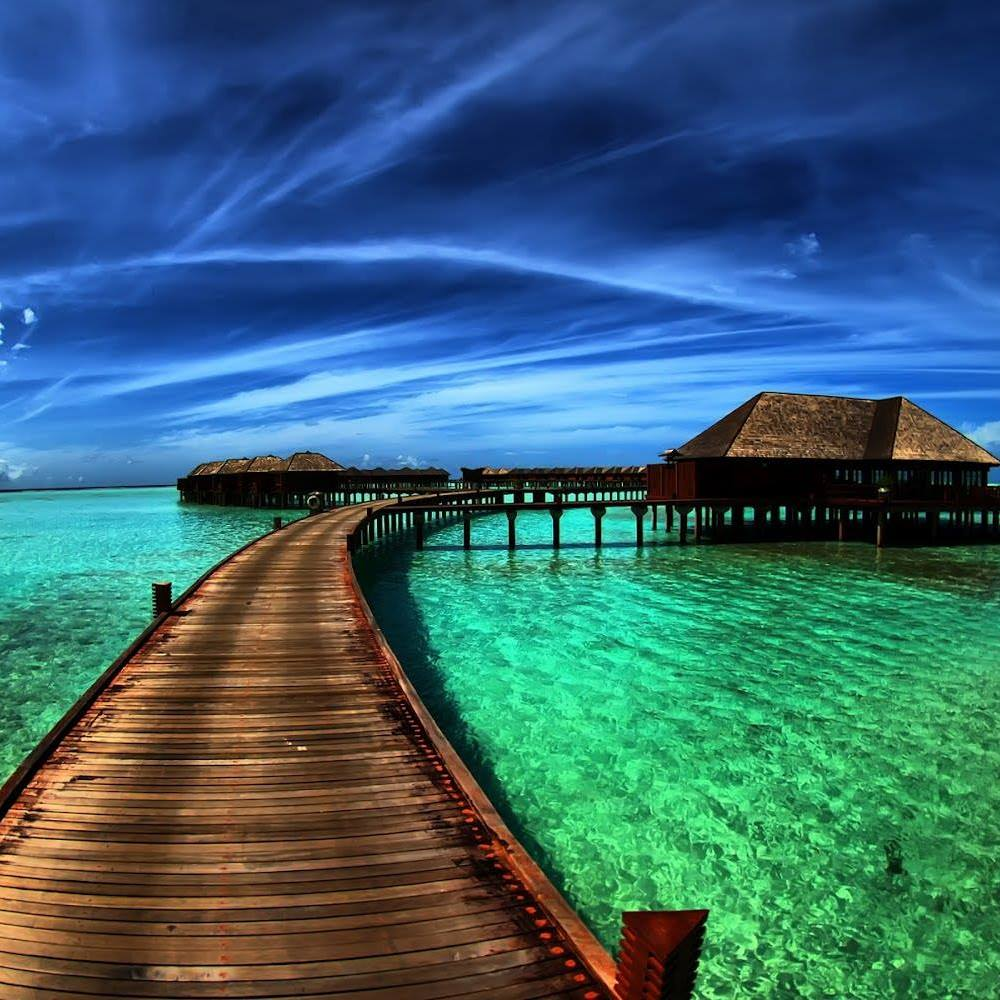

In [7]:
from PIL import Image
img = Image.open("test_img.jpg")
img

In [8]:
transformation(img)

tensor([[[-1.3302, -1.3644, -1.3644,  ..., -1.8953, -1.8953, -1.8953],
         [-1.3130, -1.3473, -1.3644,  ..., -1.8610, -1.8610, -1.8439],
         [-1.3644, -1.3473, -1.3815,  ..., -1.8610, -1.8610, -1.8439],
         ...,
         [ 1.0159,  0.9646,  0.7933,  ..., -1.3473, -1.3473, -1.2959],
         [ 0.8104,  0.5193,  0.3481,  ..., -1.3473, -1.2617, -1.1932],
         [ 0.8789,  0.6734,  0.4679,  ..., -1.2274, -0.9877, -1.0904]],

        [[-0.4251, -0.4776, -0.5476,  ..., -1.4230, -1.4230, -1.4230],
         [-0.4251, -0.4601, -0.5476,  ..., -1.3880, -1.3880, -1.3704],
         [-0.4601, -0.4951, -0.5301,  ..., -1.3704, -1.3704, -1.3529],
         ...,
         [ 0.1877,  0.1527,  0.0826,  ...,  0.1176,  0.0651,  0.0651],
         [ 0.1527, -0.1625, -0.2850,  ...,  0.0826,  0.2402,  0.2052],
         [ 0.1001, -0.0399, -0.1625,  ...,  0.2227,  0.5553,  0.3277]],

        [[ 1.2108,  1.1062,  1.0539,  ..., -0.3404, -0.3404, -0.3404],
         [ 1.2108,  1.1237,  1.0539,  ..., -0

In [9]:
import cv2
bgr_img = cv2.imread("test_img.jpg")
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

transformation_cv2 = transforms.ToTensor()
tensor_img = transformation_cv2(rgb_img)

In [10]:
tensor_img.shape

torch.Size([3, 1000, 1000])

In [12]:
transforamtion_resize = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256))])
transforamtion_resize(rgb_img)

tensor([[[0.1819, 0.1772, 0.1721,  ..., 0.0466, 0.0505, 0.0510],
         [0.1871, 0.1823, 0.1733,  ..., 0.0522, 0.0518, 0.0518],
         [0.1864, 0.1847, 0.1764,  ..., 0.0562, 0.0583, 0.0586],
         ...,
         [0.7770, 0.7416, 0.6856,  ..., 0.2280, 0.2102, 0.1791],
         [0.7183, 0.6925, 0.6511,  ..., 0.2957, 0.2968, 0.1808],
         [0.6473, 0.6626, 0.6459,  ..., 0.3039, 0.2626, 0.1748]],

        [[0.3583, 0.3540, 0.3519,  ..., 0.1329, 0.1367, 0.1373],
         [0.3636, 0.3592, 0.3531,  ..., 0.1385, 0.1381, 0.1380],
         [0.3628, 0.3616, 0.3562,  ..., 0.1425, 0.1446, 0.1449],
         ...,
         [0.5545, 0.5248, 0.4777,  ..., 0.5595, 0.5044, 0.4356],
         [0.5123, 0.4909, 0.4614,  ..., 0.6439, 0.6116, 0.4487],
         [0.4406, 0.4587, 0.4519,  ..., 0.6326, 0.5790, 0.4458]],

        [[0.6828, 0.6716, 0.6592,  ..., 0.3250, 0.3289, 0.3294],
         [0.6881, 0.6767, 0.6604,  ..., 0.3306, 0.3302, 0.3302],
         [0.6873, 0.6791, 0.6635,  ..., 0.3347, 0.3367, 0.